In [1]:
import numpy as np
import pandas as pd
import xarray
import seaborn as sns
import matplotlib.pyplot as plt

Kode ini terdiri dari dua bagian.
1. Emisi total/ GFRAC combined area
asalnya dari proses GFRAC_5_mins_combined_run2.NC yang menggabungkan fraction IR dan RF crops (16) dan grass
lalu di export ke excel (Z:\achaidir\script\stream_2\Additional\GFRACcombined_area_to_excel.py)
sudah menggunanakan CCODE raster yang baru jadi valid

2. Emisi total/ GFRACarea_32_concat.xlsx
asalnya GFRACarea_32.NC (masih IR dan RF terpisah, tanpa grass)
masih menggunakan CCODE yang lama (gpw_v4_national_identifier_grid_rev11_5_min_finall.nc)

In [2]:
df_footprint_region = pd.read_excel("X:/cadlan/stream_2/Step5/CF_emisitotal_AH_14Jan_years_minus.xlsx")
w_factor_footprint = pd.read_csv("X:/cadlan/stream_2/Step5/GFRAC_Area_Harvested_combined.csv")
# w_factor_footprint = pd.read_excel("X:/cadlan/stream_2/Step5/GFRACcombined_area_concat.xlsx")

# df_intensity_region = pd.read_excel("X:/cadlan/stream_2/Step5/AM1/CI_emisi_total_FAO_AM1.xlsx")
# w_factor_intensity = pd.read_excel("X:/cadlan/stream_2/Step4/REV_fao_stat_production_mov_average_v2_REGION.xlsx")

In [3]:
df1b = df_footprint_region.copy()
df3 = w_factor_footprint.copy()

In [4]:
df1b = df1b.rename(columns={'type': 'NGFBFC'})
df1b['CF'] = df1b['CF'].replace([np.inf, -np.inf], np.nan)
df1b['CF'] = df1b['CF'].fillna(0)

In [5]:
sorted_df = df1b.sort_values(by='CF', ascending=False)
sorted_df.head(20)

,IMAGE Region Name,NGFBFC,time,CF
876,Canada,tropical oil crops,1985,3.773590e+06
1292,Canada,tropical oil crops,1990,3.755747e+06
2956,Canada,tropical oil crops,2010,2.330259e+06
3788,Canada,tropical oil crops,2020,9.391575e+05
2124,Canada,tropical oil crops,2000,8.463622e+05
3372,Canada,tropical oil crops,2015,7.423069e+05
1768,Indonesia,temperate cereals,1995,4.563778e+05
2539,Canada,tropical cereals,2005,2.256485e+05
2955,Canada,tropical cereals,2010,1.380431e+05
936,Indonesia,temperate cereals,1985,1.224703e+05


In [6]:
df3['NGFBFC'].unique()

array(['Maize', 'Oil & palm fruit', 'Other non-food & luxury & spices',
       'Other temperate cereals', 'Plant based fibres', 'Pulses', 'Rice',
       'Soybeans', 'Sugar crops', 'Temperate oil crops',
       'Temperate roots & tubers', 'Tropical cereals',
       'Tropical oil crops', 'Tropical roots & tubers',
       'Vegetables & fruits', 'Wheat'], dtype=object)

In [7]:
sorted_filtered_df = df3[df3['NGFBFC'] == "temperate cereals"].sort_values(by='value', ascending=True)
sorted_filtered_df.head(50)

,IMAGE Region Name,NGFBFC,time,value


In [8]:
df1b.loc[df1b['CF'] > 50, 'CF'] = 0
df1b

,IMAGE Region Name,NGFBFC,time,CF
0,Brazil,maize,1975,7.112973
1,Brazil,"non food, luxury, spices",1975,7.508373
2,Brazil,palm oil,1975,11.808325
3,Brazil,plant based fibres,1975,8.977875
4,Brazil,pulses,1975,7.309203
...,...,...,...,...
4155,W. Europe,tropical cereals,2020,0.838761
4156,W. Europe,tropical oil crops,2020,0.617621
4157,W. Europe,tropical roots & tubers,2020,0.217892
4158,W. Europe,vegetables & fruits,2020,0.260494


In [9]:
# df3_melted = pd.melt(df3, id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
# df3_melted

In [10]:
df3 = df3.rename(columns={'type': 'NGFBFC'})
df3['NGFBFC'] = df3['NGFBFC'].str.lower()
df3['NGFBFC'] = df3['NGFBFC'].str.replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df3.head()

,IMAGE Region Name,NGFBFC,time,value
0,Brazil,maize,1970,11292939.05
1,Brazil,maize,1975,12085523.02
2,Brazil,maize,1980,10782062.28
3,Brazil,maize,1985,10654044.15
4,Brazil,maize,1990,13019608.51


In [11]:
#GFRAC area physical

ccode_iso = pd.read_excel("Z:/achaidir/Country Grids/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")
# df3_melted_region = pd.merge(left=ccode_iso, right=df3, how="left", left_on="ISO Country", right_on="country")
# df3_melted_region_columns_groupby = df3_melted_region.groupby(['NGFBFC', 'IMAGE Region Name']).sum().reset_index()
# df3_melted_region_columns = df3_melted_region_columns_groupby[['IMAGE Region Name', 'NGFBFC', 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]]
# df3_melted_region_index = pd.melt(df3_melted_region_columns, id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
# df3_melted_region_index = df3_melted_region_index[df3_melted_region_index['NGFBFC'] != 'grass']
# df3_melted_region_index

In [12]:
#Area Harvested
# df3_melted_region_columns = df3_melted_region[['country', 'IMAGE Region Name', 'type', 'time', 'value']]

df3_melted_region_columns_groupby = df3.groupby(['IMAGE Region Name','NGFBFC']).sum()
df3_melted_region_index = df3_melted_region_columns_groupby.reset_index()
df3_melted_region_index.head()

,IMAGE Region Name,NGFBFC,time,value
0,Brazil,maize,21945,1.652332e+08
1,Brazil,"non food, luxury, spices",21945,4.351046e+07
2,Brazil,palm oil,21945,8.987168e+05
3,Brazil,plant based fibres,21945,2.848150e+07
4,Brazil,pulses,21945,5.222961e+07


In [13]:
data1 = np.zeros((16, 26), dtype='float32')
average_AreaHarvested_RegionCrops = np.zeros((16, 26), dtype='float32')
result_average = np.zeros((16), dtype='float32')

for i, ngfbfc in enumerate(df1b['NGFBFC'].unique()):
    for n, image_region in enumerate(df3_melted_region_index['IMAGE Region Name'].unique()):
        ngfbfc_areaharves = df3_melted_region_index[(df3_melted_region_index['IMAGE Region Name'] == image_region) & (df3_melted_region_index['NGFBFC'] == ngfbfc) & (df3_melted_region_index['value'] > 0)]['value'].replace([np.inf, -np.inf], np.nan).mean()
        average_AreaHarvested_RegionCrops[i][n] = np.nan_to_num(ngfbfc_areaharves)

for i, ngfbfc in enumerate(df1b['NGFBFC'].unique()):
    carbon_footprint = df1b[df1b['NGFBFC'] == ngfbfc]['CF'].replace([np.inf, -np.inf], np.nan).mean()
    data1[i] = np.nan_to_num(carbon_footprint)


In [14]:
for x in range(0, 16):
    result_average[x] = np.average(data1[x], weights=average_AreaHarvested_RegionCrops[x])

result_average #GFRAC area

array([2.0121324, 2.8575945, 3.2253103, 1.7412423, 2.1483476, 2.1828604,
       2.6191556, 3.482452 , 1.6653843, 1.6647857, 2.093223 , 2.9778824,
       2.297896 , 2.3192515, 1.9445649, 1.8574824], dtype=float32)

In [15]:
df_avg = pd.DataFrame(result_average, index=df3_melted_region_index['NGFBFC'].unique(), columns=['value'])
df_avg = df_avg.reset_index()
df_avg = df_avg.rename(columns={"index":'NGFBFC'})
df_avg = df_avg.sort_values(by=['value'], ascending=[False])
df_avg

,NGFBFC,value
7,sugar crops,3.482452
2,palm oil,3.225310
11,tropical cereals,2.977882
1,"non food, luxury, spices",2.857594
6,soybeans,2.619156
13,tropical roots & tubers,2.319252
12,tropical oil crops,2.297896
5,rice,2.182860
4,pulses,2.148348
10,temperate roots & tubers,2.093223


In [16]:
#INI UTUK GENERATE TRADE OFF SAJA

# df_avg['NGFBFC'] = df_avg['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
# produk_diulang = np.array([item for item in df_avg['NGFBFC'].to_list() for _ in range(1)])

# df_footprint_region = df1b.replace([np.inf, -np.inf], np.nan).fillna(0)
# df_footprint_region['NGFBFC'] = df_footprint_region['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
# df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
# df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
# df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
# df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
# df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')

# df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
# df_footprint_region_index = df_footprint_region_table.stack(level=0)
# df_footprint_region_index = df_footprint_region_index.reset_index()
# df_footprint_region_index_drop = df_footprint_region_index.drop(columns=['level_2'])
# df_footprint_region_index_drop = df_footprint_region_index_drop.drop(columns=['time'])
# df_footprint_region_index_drop.index = df_footprint_region_index_drop['NGFBFC'].values

# # df_footprint_region_index_drop = df_footprint_region_index_drop.loc[produk_diulang]
# # df_footprint_region_index = df_footprint_region_index.drop(columns=['type'])

# average1_melt = df_footprint_region_index_drop.melt(id_vars=['NGFBFC'], value_name='value') 
# average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Canada"))]
# average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Central America"))]
# average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "tropical cereals") & 
#                                       (average1_melt['IMAGE Region Name'] == "Japan"))]
# average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
#                                       (average1_melt['IMAGE Region Name'] == "South Africa"))]
# average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
#                                       (average1_melt['IMAGE Region Name'] == "Rest of Southern Africa"))]
# average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
#                                       (average1_melt['IMAGE Region Name'] == "USA"))]
# average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "non food, luxury, spices") & 
#                                       (average1_melt['IMAGE Region Name'] == "Russia region"))]
# average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "soybeans") & 
#                                       (average1_melt['IMAGE Region Name'] == "Southeast Asia"))]
# average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "soybeans") & 
#                                       (average1_melt['IMAGE Region Name'] == "Indonesia region"))]


# def custom_mean(x):
#   """Calculates the mean of non-zero values."""
#   non_zero_values = x[x > 0]
#   return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0

# average = average1_melt.groupby(['IMAGE Region Name', 'NGFBFC'])['value'].apply(custom_mean).to_frame('Mean')
# average1 = average.reset_index()
# average1

# # average = average1_melt.groupby(['IMAGE Region Name', 'NGFBFC'])['value'].mean().to_frame('Mean')
# # average1 = average.reset_index()

# # average1.index = average1['NGFBFC'].values
# # average1_filtered = average1[average1['Mean'] < 20]

# # results = {}
# # average1_new = average1_filtered.sort_values(by=['Mean', 'NGFBFC'], ascending=[True, True])

# # for country in average1_new['IMAGE Region Name'].unique():
# #     for category in average1_new['NGFBFC'].unique():
# #         filtered_data = average1_new[average1_new['NGFBFC'] == category]
# #         sorted_data = filtered_data.sort_values(by='Mean', ascending=False)
# #         top_5_data = sorted_data.head(3)
# #         results[category] = top_5_data

# # df_footprint_df = pd.concat([pd.concat(results.values())])
# # df_footprint_df_filtered = df_footprint_df[df_footprint_df['Mean'] < 20]
# # df_footprint_df_filtered


In [18]:
sorted_df = average1.sort_values(by='Mean', ascending=False)
sorted_df

NameError: name 'average1' is not defined

In [19]:
df_avg['NGFBFC'] = df_avg['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
produk_diulang = np.array([item for item in df_avg['NGFBFC'].to_list() for _ in range(1)])

df_footprint_region = df1b.replace([np.inf, -np.inf], np.nan).fillna(0)
df_footprint_region['NGFBFC'] = df_footprint_region['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')

df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
df_footprint_region_index = df_footprint_region_table.stack(level=0)
df_footprint_region_index = df_footprint_region_index.reset_index()
df_footprint_region_index_drop = df_footprint_region_index.drop(columns=['level_2'])
df_footprint_region_index_drop = df_footprint_region_index_drop.drop(columns=['time'])
df_footprint_region_index_drop.index = df_footprint_region_index_drop['NGFBFC'].values

# df_footprint_region_index_drop = df_footprint_region_index_drop.loc[produk_diulang]
# df_footprint_region_index = df_footprint_region_index.drop(columns=['type'])

average1_melt = df_footprint_region_index_drop.melt(id_vars=['NGFBFC'], value_name='value') 
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Canada"))]
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Central America"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "tropical cereals") & 
                                      (average1_melt['IMAGE Region Name'] == "Japan"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
                                      (average1_melt['IMAGE Region Name'] == "South Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
                                      (average1_melt['IMAGE Region Name'] == "Rest of Southern Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
                                      (average1_melt['IMAGE Region Name'] == "USA"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "non food, luxury, spices") & 
                                      (average1_melt['IMAGE Region Name'] == "Russia region"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "soybeans") & 
                                      (average1_melt['IMAGE Region Name'] == "Southeast Asia"))]
# average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "soybeans") & 
#                                       (average1_melt['IMAGE Region Name'] == "Indonesia region"))]


def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0

# average = average1_melt.groupby(['IMAGE Region Name', 'NGFBFC'])['value'].apply(custom_mean).to_frame('Mean')
# average1 = average.reset_index()

average = average1_melt.groupby(['IMAGE Region Name', 'NGFBFC'])['value'].mean().to_frame('Mean')
average1 = average.reset_index()

average1.index = average1['NGFBFC'].values
average1_filtered = average1[average1['Mean'] < 20]

results = {}
average1_new = average1_filtered.sort_values(by=['Mean', 'NGFBFC'], ascending=[True, True])

for country in average1_new['IMAGE Region Name'].unique():
    for category in average1_new['NGFBFC'].unique():
        filtered_data = average1_new[average1_new['NGFBFC'] == category]
        sorted_data = filtered_data.sort_values(by='Mean', ascending=False)
        top_5_data = sorted_data.head(3)
        results[category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results.values())])
df_footprint_df_filtered = df_footprint_df[df_footprint_df['Mean'] < 20]
df_footprint_df_filtered


,IMAGE Region Name,NGFBFC,Mean
palm oil,Southeast Asia,palm oil,11.921544
palm oil,Brazil,palm oil,6.951083
palm oil,Mexico,palm oil,4.956941
tropical oil crops,Indonesia region,tropical oil crops,15.549689
tropical oil crops,Southeast Asia,tropical oil crops,6.278509
tropical oil crops,Brazil,tropical oil crops,5.164808
tropical roots & tubers,Indonesia region,tropical roots & tubers,11.608814
tropical roots & tubers,Southeast Asia,tropical roots & tubers,7.540685
tropical roots & tubers,Brazil,tropical roots & tubers,5.377488
soybeans,Indonesia region,soybeans,13.844490


In [20]:
sugarcrop_filtered = average1_filtered[average1_filtered['NGFBFC'] == "non food, luxury, spices"]
sugarcrop_filtered

,IMAGE Region Name,NGFBFC,Mean
"non food, luxury, spices",Brazil,"non food, luxury, spices",4.130291
"non food, luxury, spices",Central Asia,"non food, luxury, spices",0.466750
"non food, luxury, spices",Central Europe,"non food, luxury, spices",2.619603
"non food, luxury, spices",China region,"non food, luxury, spices",2.231551
"non food, luxury, spices",Eastern Africa,"non food, luxury, spices",4.067835
"non food, luxury, spices",India,"non food, luxury, spices",0.467852
"non food, luxury, spices",Indonesia region,"non food, luxury, spices",17.840494
"non food, luxury, spices",Japan,"non food, luxury, spices",1.113734
"non food, luxury, spices",Korea region,"non food, luxury, spices",1.107250
"non food, luxury, spices",Mexico,"non food, luxury, spices",2.531005


In [21]:
#df_footprint_df_filtered.loc[produk_diulang]
#  # df_footprint_df_filtered = df_footprint_df_filtered.loc[produk_diulang]
# categories = average1_filtered.loc[produk_diulang]['type'].unique()
# categories

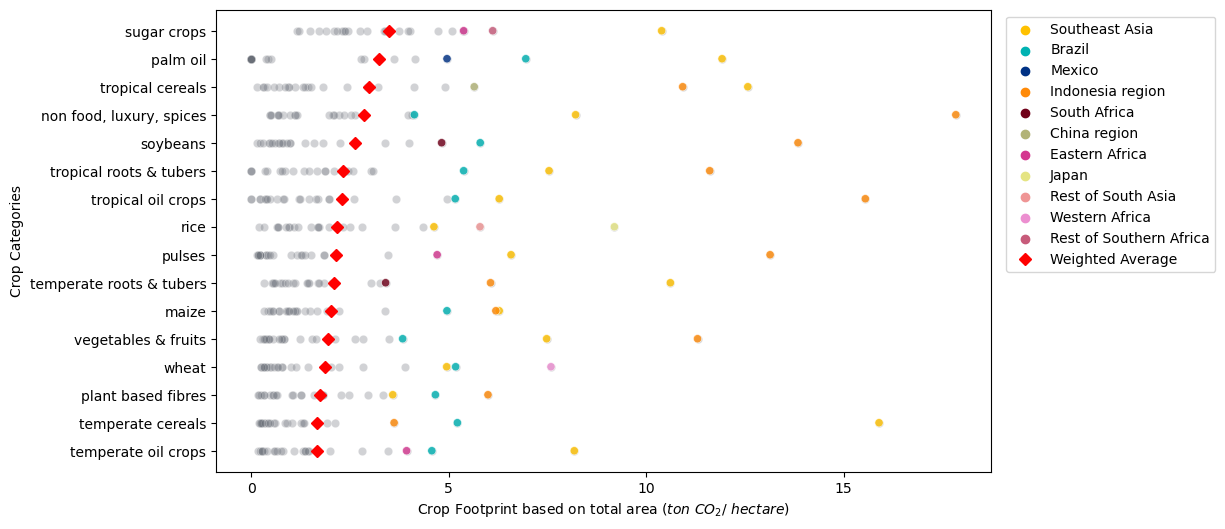

In [22]:
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots(figsize=(10, 6))

palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3','Rest of Southern Africa':'#C75B7A','South Africa':'#710019','Eastern Africa':'#D43790',
                'Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0', 'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176',
                'Western Europe':'#FED8B1', 'Rest of South America':'#254336','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285',
                'USA':'#40A2E3','Canada':'#BBE2EC'}

ax.set_xlabel('Crop Footprint based on total area ($ton~CO_2/~hectare$)')
ax.set_ylabel('Crop Categories')
sns.scatterplot(x="Mean", y="NGFBFC", color='#686D76',
                sizes=(100, 300), alpha=.3, data=average1_filtered.loc[produk_diulang])

sns.scatterplot(x="Mean", y="NGFBFC", hue='IMAGE Region Name',
                sizes=(100, 300), alpha=.8, palette=palettes, data=df_footprint_df_filtered)

ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
ax.plot(df_avg['value'].to_numpy(), df_avg['NGFBFC'].to_numpy(), "D", color='red', label='Weighted Average')
legend_handles, legend_labels = ax.get_legend_handles_labels()
weighted_average_index = legend_labels.index('Weighted Average')
weighted_average_handle = legend_handles.pop(weighted_average_index)
weighted_average_label = legend_labels.pop(weighted_average_index)
legend_handles.append(weighted_average_handle)
legend_labels.append(weighted_average_label)

ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
from matplotlib.ticker import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(5))

plt.show()